In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
S1 = pd.read_csv("Sensor1-Copy1.csv")
S2 = pd.read_csv("Sensor2-Copy1.csv")
S3 = pd.read_csv("Sensor3-Copy1.csv")
S1.replace(0, np.nan, inplace=True)
S2.replace(0, np.nan, inplace=True)
S3.replace(0, np.nan, inplace=True)

In [98]:
S1 = S1.drop(columns=["Unnamed: 0"])
S2 = S2.drop(columns=["Unnamed: 0"])
S3 = S3.drop(columns=["Unnamed: 0"])
len(S1[S1.duplicated()])

2190

In [96]:
print("number of duplicate rows in sensor 1",S1.duplicated().sum())
print("number of duplicate rows in sensor 2",S2.duplicated().sum())
print("number of duplicate rows in sensor 3",S3.duplicated().sum())
S1 = pd.DataFrame.drop_duplicates(S1)
S2 = pd.DataFrame.drop_duplicates(S2)
S3 = pd.DataFrame.drop_duplicates(S3)

number of duplicate rows in sensor 1 2190
number of duplicate rows in sensor 2 2190
number of duplicate rows in sensor 3 2190


In [60]:
class data_quality:
    def __init__(self,sensor):
        self.sensor = sensor
    def describe(self):
        return self.sensor.describe()
    def consistent(self):
        return pd.to_datetime(self.sensor["UTC Datetime"], errors='coerce').isnull().value_counts(), pd.to_datetime(self.sensor["Local Datetime"], errors='coerce').isnull().value_counts()
    
    def outliers(self):
        return sns.boxplot(self.sensor['Pedestrian'])
    def missing_data(self):
        return self.sensor.isnull().sum()

In [61]:
S1_quality=data_quality(S1)
S1_quality.consistent()

(False    6474
 Name: UTC Datetime, dtype: int64,
 False    6474
 Name: Local Datetime, dtype: int64)

In [21]:
#S1_quality.outliers()
df = pd.DataFrame(S1.dtypes)


In [7]:
S1_quality.missing_data()

UTC Datetime      0
Local Datetime    0
countlineId       0
countlineName     0
Sensor Number     0
direction         0
Pedestrian        1
dtype: int64

In [8]:
S2_quality=data_quality(S2)
S2_quality.consistent()

(False    4284
 Name: UTC Datetime, dtype: int64,
 False    4284
 Name: Local Datetime, dtype: int64)

/Users/jiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pedestrian'>

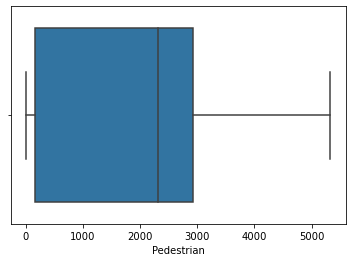

In [9]:
S2_quality.outliers()

In [10]:
S2_quality.missing_data()

UTC Datetime         0
Local Datetime       0
countlineId          0
countlineName        0
Sensor Number        0
direction            0
Pedestrian        1077
dtype: int64

In [64]:
S3_quality=data_quality(S3)
S3_quality.consistent()

(False    6474
 Name: UTC Datetime, dtype: int64,
 False    6474
 Name: Local Datetime, dtype: int64)

/Users/jiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pedestrian'>

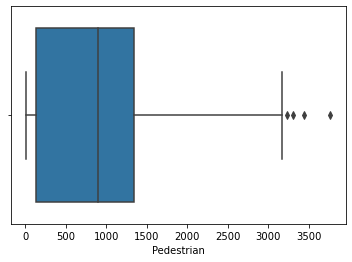

In [65]:
S3_quality.outliers()

In [13]:
S3_quality.missing_data()

UTC Datetime      0
Local Datetime    0
countlineId       0
countlineName     0
Sensor Number     0
direction         0
Pedestrian        0
dtype: int64

In [14]:
S2_avg = S2.copy()
S2_avg["month"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.month
S2_avg["year"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.year
S2_month = S2_avg.groupby(['year','month'],as_index=False).mean()
S2_month.head()

,year,month,countlineId,Pedestrian
0,2021,5,22995.0,1914.133333
1,2021,6,22995.0,2030.344444
2,2021,7,22995.0,1942.768817
3,2021,8,22995.0,1975.774194
4,2021,9,22995.0,1978.900000


In [15]:
S2_avg = S2.copy()
S2_avg["month"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.month
S2_avg["year"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.year
S2_avg["day"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.day
S2_day = S2_avg.groupby(['year','month','day'],as_index=False).mean()
S2_day.head()

,year,month,day,countlineId,Pedestrian
0,2021,5,17,22995.0,1867.666667
1,2021,5,18,22995.0,1925.166667
2,2021,5,19,22995.0,2071.833333
3,2021,5,20,22995.0,1119.833333
4,2021,5,21,22995.0,1712.666667


In [17]:
S2_avg = S2.copy()
S2_avg["month"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.month
S2_avg["year"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.year
S2_avg["week"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.week
S2_week = S2_avg.groupby(['year','month','week'],as_index=False).mean()
S2_week.head()

/var/folders/w_/ft1536ls3k3gvb2sks5dbg8h0000gn/T/ipykernel_16547/922864987.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  S2_avg["week"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.week


,year,month,week,countlineId,Pedestrian
0,2021,5,20,22995.0,1813.833333
1,2021,5,21,22995.0,1973.690476
2,2021,5,22,22995.0,2199.333333
3,2021,6,22,22995.0,2108.416667
4,2021,6,23,22995.0,2013.285714


### The cell below shows which months are totally missed

In [18]:
missingdata_month = S2_month[S2_month["Pedestrian"].isna()]
missingdata_month

,year,month,countlineId,Pedestrian
7,2021,12,22995.0,NaN
8,2022,1,22995.0,NaN
9,2022,2,22995.0,NaN
10,2022,3,22995.0,NaN
11,2022,4,22995.0,NaN


### The cell below shows which weeks are totally missed 

In [19]:
missingdata_week = S2_week[S2_week["Pedestrian"].isna()]
missingdata_week.head()

,year,month,week,countlineId,Pedestrian
34,2021,12,48,22995.0,NaN
35,2021,12,49,22995.0,NaN
36,2021,12,50,22995.0,NaN
37,2021,12,51,22995.0,NaN
38,2021,12,52,22995.0,NaN


### For days, after 2022 4-30,the missing data start from 5-1 to 5-3 and then jump to 6-18 until 7-12

### The cell below shows which days are totally missed

In [20]:
missingdata_day = S2_day[S2_day["Pedestrian"].isna()]
missingdata_day.head()

,year,month,day,countlineId,Pedestrian
198,2021,12,1,22995.0,NaN
199,2021,12,2,22995.0,NaN
200,2021,12,3,22995.0,NaN
201,2021,12,4,22995.0,NaN
202,2021,12,5,22995.0,NaN


In [36]:
max(S3["Pedestrian"])

3766

In [38]:
S1

,UTC Datetime,Local Datetime,countlineId,countlineName,Sensor Number,direction,Pedestrian
0,2021-05-17 00:00:00.000,2021-05-17 01:00:00.000,22989,S1_georgeSt_dlr001,S1,in,344.0
1,2021-05-17 00:00:00.000,2021-05-17 01:00:00.000,22989,S1_georgeSt_dlr001,S1,out,76.0
2,2021-05-17 00:00:00.000,2021-05-17 01:00:00.000,22988,S1_georgeSt_pathLHS_dlr001,S1,in,1803.0
3,2021-05-17 00:00:00.000,2021-05-17 01:00:00.000,22988,S1_georgeSt_pathLHS_dlr001,S1,out,1671.0
4,2021-05-17 00:00:00.000,2021-05-17 01:00:00.000,22990,S1_georgeSt_pathRHS_dlr001,S1,in,2666.0
...,...,...,...,...,...,...,...
6469,2023-04-30 00:00:00.000,2023-05-13 00:59:59.995,22989,S1_georgeSt_dlr001,S1,out,68.0
6470,2023-04-30 00:00:00.000,2023-05-14 00:59:59.995,22988,S1_georgeSt_pathLHS_dlr001,S1,in,2220.0
6471,2023-04-30 00:00:00.000,2023-05-15 00:59:59.995,22988,S1_georgeSt_pathLHS_dlr001,S1,out,1791.0
6472,2023-04-30 00:00:00.000,2023-05-16 00:59:59.995,22990,S1_georgeSt_pathRHS_dlr001,S1,in,2621.0
